

# Telco_churn

### Problem Statement
With increase in number of telecommunication operators a customer is entitled with unlimited freedom to switch from one mobile operator to another, if he is not satisfied with the services or pricing their providers are providing. This trend is not good for operators as they lose their revenues because of customers switching from one provider to another in search of cheap affordable high-quality products and services [1]. The rate at which you are losing subscribers or customer is called 'churn rate'

### Data Science Problem Statement
Analyse customer-level data, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. most telecom service providers lack personilized way of recommending products and services to the subscribers and most of them do not have tactics to reduce chun. Increase in churn rate will result in revenue shrinkage for the company.

### Business Goals
- Segment based on usage and identify the high value customers
- if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
- business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Before starting to work recommendations, Customer segmentation is very important.

### About Data
- As this data is mostly indian and southeast Asia,prepaid is the most common plan in used. Focus on prepaid customers.
- Class imbalance 
- Churn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
- In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
- especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase

### Approach:
For given unbalanced data build Telecom Churn Model:
- Data Cleaning
- Adding Derived Variable/Featire engineered variables and Identifing churn variable
- Exploratory Data Analysis (univariate & Bivariate).
- Segement High value customers based on usage
- Treating categorical variable.
- Perform SMOTE to address data imbalance
- Dimentinality Reduction  and selecting good features using sklearn (scikit-learn)
    - PCA (Pricipal Component Analsis), 
     
- Machine Learning Model using sklearn (scikit-learn)
    - Logistic Regression
    RFE (Recursive Feature Elimination)
    - Decission Tree
    - Random Forest
    - XGBoost
    - SVM   
- Model Accuracy comparision
    -- Confusion Matrix
    -- Model accuracy using 
    -- Recall/True positive rate

### Customer Segmentation:
There are four segmentation schemes of primary importance: 
- customer value segmentation (In this notebook Customer segmentation only on high value)
- customer behaviour segmentation 
- customer lifecycle segmentation
- customer migration segmentation

### Evaluation Metric
We will be using F1 score / Recall

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. Apart from Recall Interpretibility, Number of featurees, Test Accuracy, AUC and F1 are considered to choose best model

#### Data Cleaning

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no information (all entries are null or same)
4. Convert dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

### Import libraries and load datafile

In [51]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import warnings
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

telecom_train = pd.read_csv('telecom_churn_data.csv', low_memory=False)

/home/roott/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Understand the properties of loaded dataframe
telecom = telecom_train.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [3]:
telecom.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [4]:
for col in telecom.columns:
    print('{} -  missing values: {} and datatype is {}'.format(col, telecom[col].isnull().sum(), telecom[col].dtype))

mobile_number -  missing values: 0 and datatype is int64
circle_id -  missing values: 0 and datatype is int64
loc_og_t2o_mou -  missing values: 1018 and datatype is float64
std_og_t2o_mou -  missing values: 1018 and datatype is float64
loc_ic_t2o_mou -  missing values: 1018 and datatype is float64
last_date_of_month_6 -  missing values: 0 and datatype is object
last_date_of_month_7 -  missing values: 601 and datatype is object
last_date_of_month_8 -  missing values: 1100 and datatype is object
last_date_of_month_9 -  missing values: 1659 and datatype is object
arpu_6 -  missing values: 0 and datatype is float64
arpu_7 -  missing values: 0 and datatype is float64
arpu_8 -  missing values: 0 and datatype is float64
arpu_9 -  missing values: 0 and datatype is float64
onnet_mou_6 -  missing values: 3937 and datatype is float64
onnet_mou_7 -  missing values: 3859 and datatype is float64
onnet_mou_8 -  missing values: 5378 and datatype is float64
onnet_mou_9 -  missing values: 7745 and datat

In [5]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

#### High Value Customers
Before cleaning data create new columns which helps to identify 'High Value Customers', this should be done before clean up because the high value customer identification should not be impacted by any cleanup. 
Additionally since the problem we are solving is related to high value customers (hvc) we do not to deal with missing values in the non-high value customers.

Those who have recharged with an amount more than or equal to X, here we are considering threshhold percent is 70th percentile of the average recharge amount in the first two months (the good phase).

In [6]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

telecom["total_recharge_good_phase"] = (telecom[["total_rech_data_amt_6", "total_rech_data_amt_7", "total_rech_amt_6", "total_rech_amt_7"]].fillna(0).sum(axis=1))/2
hvc_cuttoff = np.percentile(telecom["total_recharge_good_phase"], 70)

#filtering data
telecom_hvc = telecom[telecom.total_recharge_good_phase > hvc_cuttoff]

# there should be approx 29.9k records
"{0} of records in High value customers dataset".format(telecom_hvc.shape[0])

'29953 of records in High value customers dataset'

### Labelling Churners
Labelling churners from high value customers range so that we can remove the attributes of the churn phase.
Strategy Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
The sum of below is zero means - churned, churn = 1
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [7]:
telecom_hvc["total_usage_9"] = telecom_hvc.loc[:,['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1)
telecom_hvc["churn"] = (telecom_hvc["total_usage_9"]>0).map({True:0,False:1})
print("High-value Churn Percentage : {}%".format(round(len(telecom_hvc[telecom_hvc.churn == 1])/telecom_hvc.shape[0] *100,2)))

High-value Churn Percentage : 8.12%


/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


This indicated an highly imbalanced data set where the churn cases are the minority(8%) as opposed to the non-churners who are the majority(92%)

### Data Cleaning

In [8]:
## Utility functions

## Here I'm considering a higher cut off range not to loose much data.

def get_iqr(ds, col):
    return ds[col].quantile(0.98) - ds[col].quantile(0.02)

def get_upperlimit(ds, col):
    return ds[col].quantile(0.98) + (1.5 * (get_iqr(ds,col)))

def get_upperlimit_extreme(ds, col):
    return ds[col].quantile(0.98) + (3 * (get_iqr(ds,col)))

def get_lowerlimit(ds, col):
    return ds[col].quantile(0.02) - (1.5 * (get_iqr(ds,col)))

def get_lowerlimit_extreme(ds, col):
    return ds[col].quantile(0.02) - (3 * (get_iqr(ds,col)))

def get_percentage_of_upper(ds, col):
    total = len(ds)
    upper_limit = get_upperlimit(ds,col)
    return round(ds[ds[col] > upper_limit].shape[0]/total * 100,2)
    
def get_percentage_of_upper_extreme(ds, col):
    total = len(ds)
    upper_limit_extreme = get_upperlimit_extreme(ds,col)
    return round(ds[ds[col] > upper_limit_extreme].shape[0]/total * 100,2)

def get_percentage(x):
    return round(100*x,2)

In [50]:
# missing percentage
df_nas = pd.DataFrame(round(100*telecom_hvc.isnull().sum().sort_values(ascending=False)/len(telecom_hvc),2)).reset_index()
df_nas

,index,0
0,max_rech_data_9,49.25
1,arpu_3g_9,49.25
2,av_rech_amt_data_9,49.25
3,total_rech_data_amt_9,49.25
4,total_rech_data_9,49.25
...,...,...
228,last_day_rch_amt_7,0.00
229,last_day_rch_amt_8,0.00
230,last_day_rch_amt_9,0.00
231,vol_2g_mb_6,0.00


In [9]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
telecom_hvc.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

/home/roott/.local/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# plot the columns with na 
plt.figure(figsize=(40,10))
sns.barplot(x=df_nas["index"].values, y=df_nas[0].values, palette="Reds_r");
plt.title("Percentage of missing values in train & test");
plt.ylabel("%");
plt.xticks(rotation=90);

NameError: name 'df_nas' is not defined

<Figure size 2880x720 with 0 Axes>

In [11]:
# The following data is not required for analysis
telecom_hvc.drop(["mobile_number"], axis=1, inplace=True)

/home/roott/.local/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
# Correcting data type of date types
for col in telecom_hvc.columns:
    if telecom_hvc[col].dtype == object:
            telecom_hvc[col] = pd.to_datetime(telecom_hvc[col])
telecom_hvc.head()

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_recharge_good_phase,total_usage_9,churn
0,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.38,214.82,...,0.00,101.20,3.58,252.00,252.00,252.00,nan,559.00,0.00,1
7,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.18,1349.85,...,19.38,18.74,0.00,nan,nan,nan,nan,1185.00,0.00,1
8,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.72,492.22,...,910.65,122.16,0.00,nan,354.00,207.00,nan,696.00,177.09,0
21,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,2014-09-30,514.45,597.75,...,0.00,0.00,0.00,nan,nan,nan,nan,640.00,1284.14,0
23,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,2014-09-30,74.35,193.90,...,51.86,0.00,0.00,nan,712.00,540.00,252.00,583.00,583.78,0


In [13]:
# There are still 125 columns let us check how much variance each column has.
low_variance_columns = []
for col in telecom_hvc.columns:
    if telecom_hvc[col].nunique() == 1:
        low_variance_columns.append(col)
print("Columns that have low variance and can be removed: {0}".format(low_variance_columns))
telecom_hvc.drop(low_variance_columns, axis=1, inplace=True)
telecom_hvc.shape

Columns that have low variance and can be removed: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


/home/roott/.local/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(29953, 216)

In [14]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9' by adding 2g and 3g usage of 6,7,8,9 months
for i in range(6,10):
    telecom_hvc['vol_data_mb_'+str(i)] = (telecom_hvc['vol_2g_mb_'+str(i)]+telecom_hvc['vol_3g_mb_'+str(i)]).astype(int)

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    telecom_hvc['total_month_rech_'+str(i)] = telecom_hvc['total_rech_amt_'+str(i)]+telecom_hvc['total_rech_data_amt_'+str(i)]

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Cols with _9 in the name will not be used in the analysis 
for col in telecom_hvc.columns:
    if ("_9" in col):
        telecom_hvc.drop(col, inplace=True, axis=1)

In [17]:
telecom_hvc.shape

(29953, 168)

In [18]:
# date based columns are not important hence removing. 
for col in telecom_hvc.columns:
    if "datetime64[ns]"==telecom_hvc[col].dtype:
        print("Removing column : {0}".format(col))
        telecom_hvc.drop(col, axis=1, inplace=True)

Removing column : date_of_last_rech_6
Removing column : date_of_last_rech_7
Removing column : date_of_last_rech_8
Removing column : date_of_last_rech_data_6
Removing column : date_of_last_rech_data_7
Removing column : date_of_last_rech_data_8


In [19]:
telecom_hvc = telecom_hvc.fillna(0)
telecom_hvc.to_csv("telecom_churn_hvc_clean.csv", index=False)
data_hvc_clean = pd.read_csv("telecom_churn_hvc_clean.csv")
data_hvc_clean.shape

(29953, 162)

In [20]:
# Utility Functions

# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_hvc_clean
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",showfliers=False,palette="Set3")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("Set3"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("Set3"))
    plt.show()
    
# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()
    
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()
    
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=data_hvc_clean.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")
    
    
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(data_hvc_clean.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return data_hvc_clean.groupby('churn')[colList].mean()

In [21]:
# Filtering the common monthly columns for each month
comcol = data_hvc_clean.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'total_rech_data_amt',
 'vol_data_mb',
 'total_month_rech']

In [22]:
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", data_hvc_clean.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 4))
print ("Columns other than monthly columns :", data_hvc_clean.shape[1] - (len(monthlycol) * 4))

Total number of columns in data : 162
Number of columns for each month :  53
Total monthly columns among the orignal columns (53*4): 212
Columns other than monthly columns : -50


count   29953.00
mean     1209.28
std       957.45
min       180.00
25%       460.00
50%       846.00
75%      1756.00
max      4321.00
Name: aon, dtype: float64


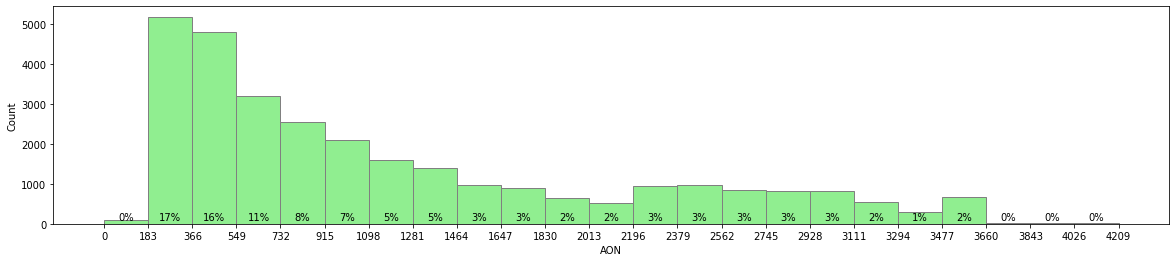

In [23]:
# Customers distribution of the age on network
print(data_hvc_clean.aon.describe())
plot_hist(data_hvc_clean,'aon', 183)

- Minimun Age on network is 180 days.
- Average age on network for customers is 1200 days (3.2 years).
- 46% of the HV users are in their 2nd year with the network.
- Almost 71% users have Age on network less than 4 years.
- 15% users are with the network from over 7 years.

In [26]:
#Create Derived categorical variable
data_hvc_clean['aon_bin'] = pd.cut(data_hvc_clean['aon'], range(0,data_hvc_clean['aon'].max(),365), 
                                   labels=range(0,int(round(data_hvc_clean['aon'].max()/365))-1))

<AxesSubplot:xlabel='churn,aon_bin'>

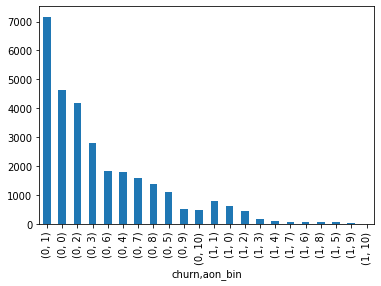

In [28]:
# How the AON bins are distributed by churn vs non churn customers
data_hvc_clean.groupby(['churn'])['aon_bin'].value_counts().plot.bar()

count   2433.00
mean     860.64
std      746.71
min      180.00
25%      356.00
50%      602.00
75%     1035.00
max     3670.00
Name: aon, dtype: float64


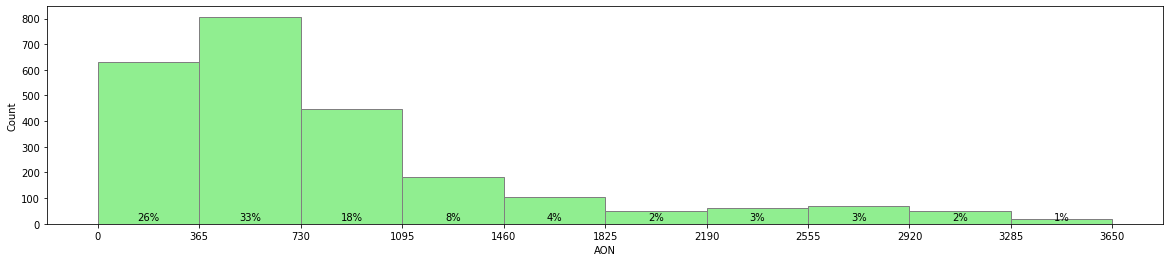

In [29]:
data_hvc_clean_churnonly = data_hvc_clean[data_hvc_clean.churn==1]
print(data_hvc_clean_churnonly.aon.describe())
plot_hist(data_hvc_clean_churnonly,'aon',365)

##### Insights

- 77% of the users who churned are within 3 years, which means the customers who are loyal i.e > 3 years are less likely to churn.
- The telecom company should look for options to increase the loyality factor for high value customers, who are with the network for 3 years or less. It can also look for 2 years or less if budget is a factor for providing any perks.

In [31]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    data_hvc_clean['og_to_ic_mou_'+str(i)] = (data_hvc_clean['total_og_mou_'+str(i)])/(data_hvc_clean['total_ic_mou_'+str(i)]+1)

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


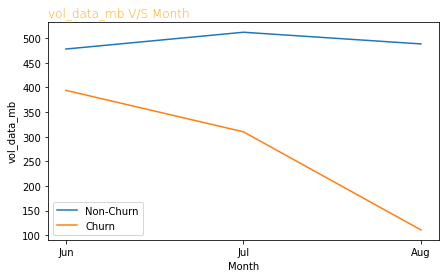

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,477.74,511.80,488.11
1,393.96,309.86,110.85


In [32]:
plot_byChurn(data_hvc_clean,'vol_data_mb')

- data usage is reduced for thechurned customers

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


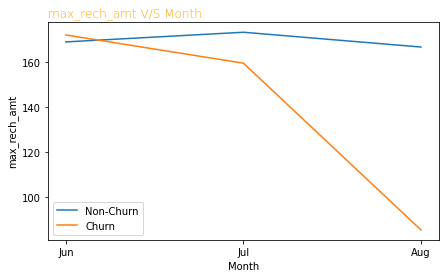

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.10,173.40,166.83
1,172.18,159.66,85.54


In [33]:
plot_byChurn(data_hvc_clean,'max_rech_amt')

- recharge amount also dropped for churned customers

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


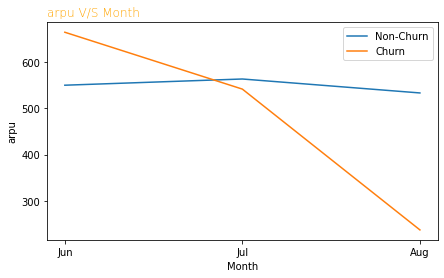

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.55,562.93,532.87
1,663.71,541.15,237.66


In [34]:
plot_byChurn(data_hvc_clean,'arpu')

- arpu drops significantly for churned cutomers

In [35]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    data_hvc_clean['Total_loc_mou_'+str(i)] = (data_hvc_clean['loc_og_mou_'+str(i)])+(data_hvc_clean['loc_ic_mou_'+str(i)])

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


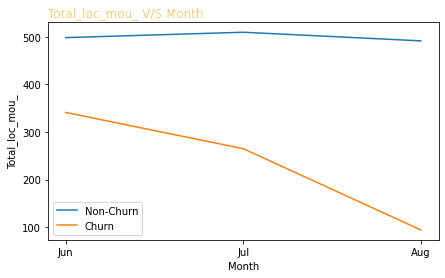

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.29,509.61,491.52
1,341.08,264.97,94.27


In [36]:
plot_byChurn(data_hvc_clean,'Total_loc_mou_')

insights:
- The Total local call mou is generally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


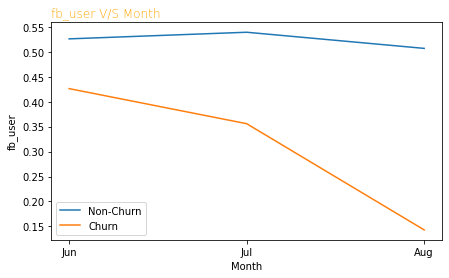

,fb_user_6,fb_user_7,fb_user_8
churn,,,
0,0.53,0.54,0.51
1,0.43,0.36,0.14


In [37]:
plot_byChurn(data_hvc_clean,'fb_user')

- fb usage was also low for churned customers

In [38]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    data_hvc_clean['Total_roam_mou_'+str(i)] = (data_hvc_clean['roam_ic_mou_'+str(i)])+(data_hvc_clean['roam_og_mou_'+str(i)])

/home/roott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator


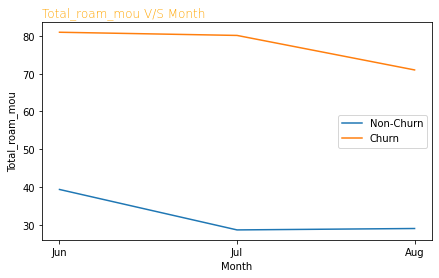

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.34,28.61,28.99
1,81.00,80.16,71.01


In [39]:
plot_byChurn(data_hvc_clean,'Total_roam_mou')

- roaming usage is more for churned  customers.


In [40]:
#removing categorical column which is not needed for analysis
data_hvc_clean.drop("aon_bin", axis=1, inplace=True)

In [41]:
# clubbing columns related to good phase
for col in data_hvc_clean.filter(regex="_6|_7").columns.unique():
    avg_col_name = "avgof67_" + col[:-2]
    data_hvc_clean[avg_col_name] = (data_hvc_clean[col] + data_hvc_clean[col[:-1]+"7"])/2

In [43]:
# Statistically treating outliers, here we are removed the outliers greater than 98th percentile + 3times IQR 
for col in data_hvc_clean.columns:
    if get_upperlimit_extreme(data_hvc_clean,col) > 0:
        data_hvc_clean = data_hvc_clean[~(data_hvc_clean[col] >= get_upperlimit_extreme(data_hvc_clean,col))]
        
data_hvc_clean.shape

(26276, 227)

In [45]:
# % of data after outlier treatment
data_hvc_clean.shape[0]/telecom_hvc.shape[0]

0.8772410109171035

In [46]:
#Some data clean up needed before PCA
# dropping cols with _6 nad _7 in the names since we clubbed
# also removed sep columns as it is the target month 
to_drop = data_hvc_clean.filter(regex='_6|_7|sep').columns
data_hvc_clean.drop(to_drop, axis=1, inplace=True)
data_hvc_clean.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avgof67_monthly_3g,avgof67_sachet_3g,avgof67_fb_user,avgof67_vbc_3g,avgof67_total_rech_data_amt,avgof67_vol_data_mb,avgof67_total_month_rech,avgof67_og_to_ic_mou,avgof67_Total_loc_mou,avgof67_Total_roam_mou
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,50.60,252.00,152.00,504.00,0.00,0.00,0.00
2,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,0.00,0.00,1.00,516.40,354.00,1106.00,955.00,14.64,312.01,0.00
3,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.74,181.77,0.00
4,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,...,2.00,0.00,1.00,25.93,712.00,599.00,1166.00,0.63,308.09,0.00
6,393.91,666.38,97.81,0.00,0.00,9.48,18.96,0.00,0.00,28.44,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.73,62.06,0.00


In [47]:
#lets check the correlation amongst the features, drop the highly correlated ones
corr = data_hvc_clean.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if (any(upper_tri[column] > 0.75) and column != 'churn')]
print(to_drop)
data_hvc_clean.drop(to_drop, axis=1, inplace=True)

['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'total_rech_data_amt_8', 'vol_data_mb_8', 'total_month_rech_8', 'Total_loc_mou_8', 'Total_roam_mou_8', 'avgof67_onnet_mou', 'avgof67_offnet_mou', 'avgof67_roam_og_mou', 'avgof67_loc_og_t2t_mou', 'avgof67_loc_og_t2m_mou', 'avgof67_loc_og_t2f_mou', 'avgof67_loc_og_mou', 'avgof67_std_og_t2t_mou', 'avgof67_std_og_t2m_mou', 'avgof67_std_og_mou', 'avgof67_total_og_mou', 'avgof67_loc_ic_t2t_mou', 'avgof67_loc_ic_t2m_mou', 'avgof67_loc_ic_t2f_mou', 'avgof67_loc_ic_mou', 'avgof67_std_ic_mou', 'avgof67_total_ic_mou', 'avgof67_total_rech_num', 'avgof67_total_rech_amt', 'avgof67_count_rech_2g', 'avgof67_av_rech_amt_data', 'avgof67_vol_3g_mb', 'avgof67_arpu_3g', 'avgof67_arpu_2g', 'avgof67_sachet_2g', 'avgof67_monthly_3g', 'avgof

In [48]:
data_hvc_clean.shape


(26276, 63)

### PCA
to reduce dimentionality

[Text(0.5, 1.0, '% of churned high value customers')]

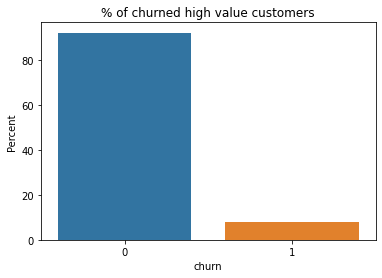

In [49]:
# Let us once look at % of churn rate
ax = sns.barplot(x="churn", y="churn", data=data_hvc_clean, estimator=lambda x: len(x) / len(data_hvc_clean) * 100)
ax.set(ylabel="Percent")
ax.set(title="% of churned high value customers")

In [53]:

# train test split
y = data_hvc_clean.pop("churn")
X = data_hvc_clean
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=1)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18393, 62), (7883, 62), (18393,), (7883,))

##### Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

##### Advantages

Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
No loss of useful information

In [55]:
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=100)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)

In [56]:
X_train_ns = X_train.copy()
X_test_ns = X_test.copy()
# Scale data. 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

(   arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
 0   -0.42        -0.37         -0.46          -0.27          -0.30   
 1    1.35         2.55          0.91          -0.27          -0.30   
 2    0.41         0.15          0.40          -0.27          -0.30   
 3    0.20        -0.32         -0.37          -0.27          -0.30   
 4    0.37        -0.36         -0.23          -0.27          -0.30   
 
    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
 0             -0.09             -0.27              0.09             -0.27   
 1              0.49              0.07             -0.29             -0.27   
 2              1.37              1.48             -0.29             -0.27   
 3              0.04             -0.06             -0.04             -0.27   
 4             -0.14              0.05             -0.20             -0.27   
 
    std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
 0             -0.16         -0.11   

In [57]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [58]:
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

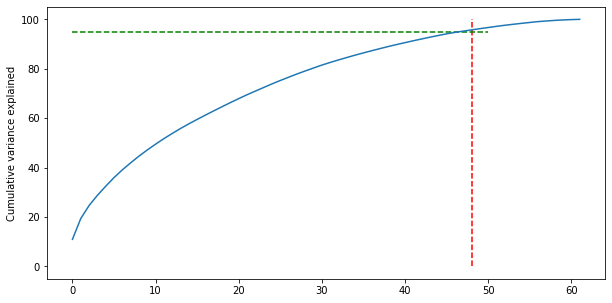

In [59]:
plt.figure(figsize=(10,5))
plt.vlines(x=48, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [60]:
# Picking 30 components here which hold at least 95
pca_final = IncrementalPCA(n_components=48)
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_test_pca = pd.DataFrame(pca_final.transform(X_test))
X_train_pca.shape, X_test_pca.shape

((33860, 48), (7883, 48))

In [61]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(48, 48)

In [62]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.01602598274862164 , min corr:  -0.021972483754747606


In [63]:
## Key Components
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC-1':pca_final.components_[0],'PC-2':pca_final.components_[1], 'PC-3':pca_final.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.24,0.26,0.12,arpu_8
1,0.05,0.23,0.19,onnet_mou_8
2,0.12,0.26,0.14,offnet_mou_8
3,0.00,0.07,-0.06,roam_ic_mou_8
4,-0.01,0.10,-0.03,roam_og_mou_8
5,0.12,0.15,0.01,loc_og_t2t_mou_8
6,0.18,0.19,-0.01,loc_og_t2m_mou_8
7,0.14,0.11,-0.12,loc_og_t2f_mou_8
8,0.06,0.06,0.19,loc_og_t2c_mou_8
9,0.08,0.07,-0.09,std_og_t2f_mou_8


#### Modeling
The algorithms that we should be trying with hyperparameter tuning
Logistic Regression
Decision Tree
Random Forest
XGBoost

Since it is important to identify a churn customer correctly than failing to identify non-churns - True Positive Rate / Recall should be used as a measure along with accuracy.
In cases when default parameters did not provide satisfactory results, hyper parameter tuning is performed. It is done in such a way that if the parameters which are picked by the algorithm lies to extreme left or right the parameters are tuned and the model is re-trained.

In [64]:
## Re-usable functions
model_metrics = [] 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()
    

def get_model_metrics_using_predict(name, model, X_train, X_test, y_train, y_test):
    acc_train = round(accuracy_score(y_train, model.predict(X_train)),2)
    cm_train = confusion_matrix(y_train, model.predict(X_train))
    acc_test = round(accuracy_score(y_test, model.predict(X_test)),2)
    cm_test = confusion_matrix(y_test, model.predict(X_test))
    auc = round(roc_auc_score(y_test, model.predict(X_test)),2)
    pre = round(precision_score(y_test, model.predict(X_test)),2)
    rec = round(recall_score(y_test, model.predict(X_test)),2)
    f1 = round(f1_score(y_test, model.predict(X_test)),2)
    print("-"*50)
    print("Train Accuracy :", acc_train)
    print("Train Confusion Matrix:", cm_train)
    print(cm_train)
    print("-"*50)
    print("Test Accuracy :", acc_test)
    print("Test Confusion Matrix:")
    print(cm_test)
    print("-"*50)
    print("AUC Score:")
    print(auc)
    print("-"*50)
    print("Precision Score:")
    print(pre)
    print("-"*50)
    print("Recall/Sensitivity Score:")
    print(rec)
    print("-"*50)
    print("F1 Score:")
    print(f1)
    print("-"*50)
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))
    draw_roc(y_test,  model.predict(X_test))
    model_metrics.append({"model_name":name, "train_accuracy": acc_train, "test_accuracy" : acc_test, 
                              "auc":auc, "precision": pre, "recall" : rec, "f1": f1, "model": model}) 


def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df


### Logistic Regression

--------------------------------------------------
Train Accuracy : 0.84
Train Confusion Matrix: [[13950  2980]
 [ 2393 14537]]
[[13950  2980]
 [ 2393 14537]]
--------------------------------------------------
Test Accuracy : 0.82
Test Confusion Matrix:
[[5989 1272]
 [ 109  513]]
--------------------------------------------------
AUC Score:
0.82
--------------------------------------------------
Precision Score:
0.29
--------------------------------------------------
Recall/Sensitivity Score:
0.82
--------------------------------------------------
F1 Score:
0.43
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7261
           1       0.29      0.82      0.43       622

    accuracy                           0.82      7883
   macro avg       0.63      0.82      0.66      7883
weighted avg       0.93      0.82      0.86      7883



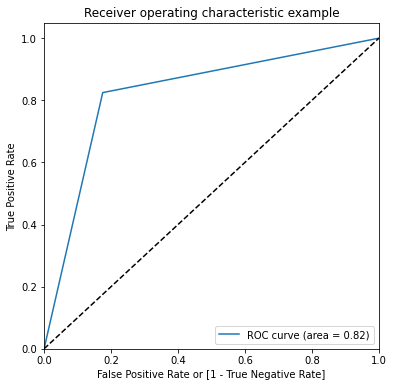

--------------------------------------------------
Train Metrics with probability: 0.5
Roc_auc_score : 0.8413171884229179
Sensitivity/Recall : 0.858653278204371
Specificity: 0.8239810986414648
False Positive Rate: 0.17601890135853515
Positive predictive value: 0.8298795455842896
Negative Predictive value: 0.8535764547512696
sklearn precision score value: 0.8298795455842896
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.72   0.98   0.47
0.20  0.20      0.78   0.96   0.60
0.30  0.30      0.81   0.93   0.69
0.40  0.40      0.83   0.90   0.76
0.50  0.50      0.84   0.86   0.82
0.60  0.60      0.84   0.81   0.88
0.70  0.70      0.83   0.75   0.91
0.80  0.80      0.81   0.66   0.95
0.90  0.90      0.67   0.35   0.98


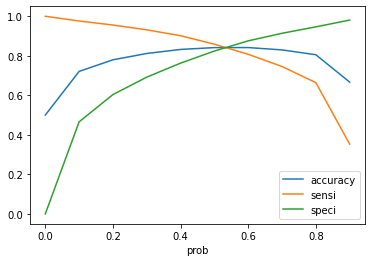

--------------------------------------------------
Test Metrics with probability: 0.45
Roc_auc_score : 0.8193075280835685
Sensitivity/Recall : 0.842443729903537
Specificity: 0.7961713262636001
False Positive Rate: 0.20382867373639996
Positive predictive value: 0.26147704590818366
Negative Predictive value: 0.9833304983840789
sklearn precision score value: 0.26147704590818366


,churn,churn_Prob,final_predicted
1648,0,0.04,0
15755,0,0.03,0
22784,0,0.53,1
18386,0,0.07,0
12806,0,0.67,1
...,...,...,...
5291,0,0.00,0
17186,0,0.62,1
8762,0,0.04,0
20920,0,0.37,0


In [66]:
slr_pca = LogisticRegression()
model_slr_pca = slr_pca.fit(X_train_pca, y_train)
get_model_metrics_using_predict("Logistic Regression", model_slr_pca, X_train_pca, X_test_pca, y_train, y_test)
cut_off_prob=0.5
print("-"*50)
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(slr_pca,X_train_pca,y_train,cut_off_prob)
findOptimalCutoff(y_train_df)
cut_off_prob = 0.45
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
predictChurnWithProb(slr_pca,X_test_pca,y_test,cut_off_prob)

#### Summary from Logistic Regression
- Accuracy : The model shows a train accuracy 84% and test accuracy of 82%, which shows the model is good.
- AUC : The AUC score is 82 which also proves the model is performing good.
- Recall : 82% with default predictions , by reducing the cut off to 45% we can increase it by another 2%

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8406969875959834
--------------------------------------------------
Train Accuracy : 0.84
Train Confusion Matrix: [[13939  2991]
 [ 2387 14543]]
[[13939  2991]
 [ 2387 14543]]
--------------------------------------------------
Test Accuracy : 0.83
Test Confusion Matrix:
[[5990 1271]
 [ 108  514]]
--------------------------------------------------
AUC Score:
0.83
--------------------------------------------------
Precision Score:
0.29
--------------------------------------------------
Recall/Sensitivity Score:
0.83
--------------------------------------------------
F1 Score:
0.43
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7261
           1       0.29      0.83      0.43       622

    accuracy                           0.83      7883
   macro avg       0.64      0.83     

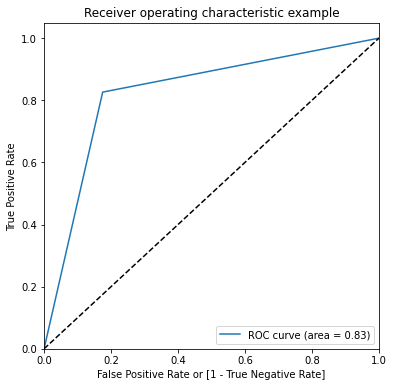

--------------------------------------------------
Train Metrics with probability: 0.5
Roc_auc_score : 0.8411695215593621
Sensitivity/Recall : 0.8590076786769049
Specificity: 0.8233313644418192
False Positive Rate: 0.17666863555818074
Positive predictive value: 0.8294171324284247
Negative Predictive value: 0.8537914982236923
sklearn precision score value: 0.8294171324284247
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.71   0.98   0.45
0.20  0.20      0.78   0.96   0.59
0.30  0.30      0.81   0.93   0.69
0.40  0.40      0.83   0.90   0.76
0.50  0.50      0.84   0.86   0.82
0.60  0.60      0.84   0.81   0.88
0.70  0.70      0.83   0.74   0.91
0.80  0.80      0.80   0.66   0.95
0.90  0.90      0.65   0.32   0.98


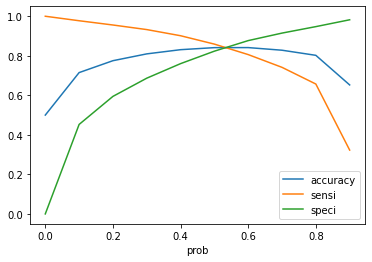

--------------------------------------------------
Test Metrics with probability: 0.5
Roc_auc_score : 0.8256608999052772
Sensitivity/Recall : 0.8263665594855305
Specificity: 0.8249552403250241
False Positive Rate: 0.1750447596749759
Positive predictive value: 0.2879551820728291
Negative Predictive value: 0.9822892751721876
sklearn precision score value: 0.2879551820728291


,churn,churn_Prob,final_predicted
1648,0,0.05,0
15755,0,0.03,0
22784,0,0.54,1
18386,0,0.07,0
12806,0,0.66,1
...,...,...,...
5291,0,0.00,0
17186,0,0.61,1
8762,0,0.04,0
20920,0,0.39,0


In [67]:
grid={"C":[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5], "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5,n_jobs=-1)
logreg_cv.fit(X_train_pca,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

lr_reg_pca = logreg_cv.best_estimator_
model_lr_reg_pca = lr_reg_pca.fit(X_train_pca, y_train)
get_model_metrics_using_predict("Logistic Regression - HyperParameters", model_lr_reg_pca, X_train_pca, X_test_pca, y_train, y_test)

cut_off_prob=0.5
print("-"*50)
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(model_lr_reg_pca,X_train_pca,y_train,cut_off_prob)
findOptimalCutoff(y_train_df)
cut_off_prob = 0.5
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
predictChurnWithProb(model_lr_reg_pca,X_test_pca,y_test,cut_off_prob)

#### Summary of Logistic Regression with Hyperparameter.
- Accuracy : The model shows a train accuracy 84% and test accuracy of 83% (observe 1% inc. due to regularization), which shows the model is good.
- AUC : The AUC score is 83, inc of 1% due to regularization
- Recall : 83% with default predictions, it can further be increased to 86% by reducing threshold to 0.45.

--------------------------------------------------
Train Accuracy : 0.84
Train Confusion Matrix: [[13771  3159]
 [ 2275 14655]]
[[13771  3159]
 [ 2275 14655]]
--------------------------------------------------
Test Accuracy : 0.81
Test Confusion Matrix:
[[5900 1361]
 [ 113  509]]
--------------------------------------------------
AUC Score:
0.82
--------------------------------------------------
Precision Score:
0.27
--------------------------------------------------
Recall/Sensitivity Score:
0.82
--------------------------------------------------
F1 Score:
0.41
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7261
           1       0.27      0.82      0.41       622

    accuracy                           0.81      7883
   macro avg       0.63      0.82      0.65      7883
weighted avg       0.93      0.81      0.85      7883



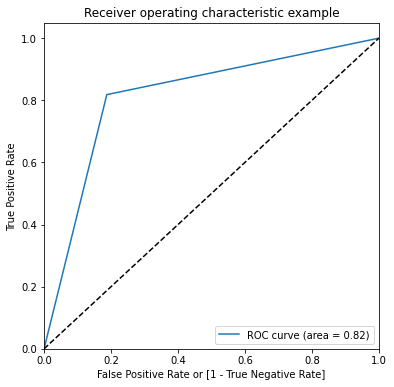

Roc_auc_score : 0.839515652687537
Sensitivity/Recall : 0.8656231541642055
Specificity: 0.8134081512108683
False Positive Rate: 0.1865918487891317
Positive predictive value: 0.8226675648366454
Negative Predictive value: 0.8582201171631559
sklearn precision score value: 0.8226675648366454
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.73   0.98   0.48
0.20  0.20      0.78   0.96   0.60
0.30  0.30      0.81   0.93   0.69
0.40  0.40      0.83   0.90   0.76
0.50  0.50      0.84   0.87   0.81
0.60  0.60      0.84   0.82   0.86
0.70  0.70      0.83   0.75   0.91
0.80  0.80      0.80   0.66   0.95
0.90  0.90      0.64   0.30   0.99


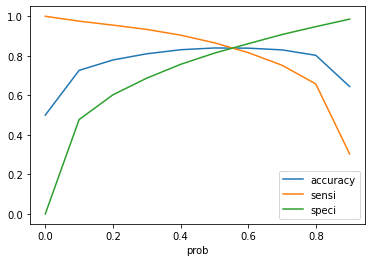

Train Metrics with probability: 0.5
Roc_auc_score : 0.839515652687537
Sensitivity/Recall : 0.8656231541642055
Specificity: 0.8134081512108683
False Positive Rate: 0.1865918487891317
Positive predictive value: 0.8226675648366454
Negative Predictive value: 0.8582201171631559
sklearn precision score value: 0.8226675648366454
--------------------------------------------------
Test Metrics with probability: 0.45
Roc_auc_score : 0.812030731950769
Sensitivity/Recall : 0.8408360128617364
Specificity: 0.7832254510398017
False Positive Rate: 0.21677454896019832
Positive predictive value: 0.24940391034811635
Negative Predictive value: 0.9828897338403042
sklearn precision score value: 0.24940391034811635


In [68]:
# Logistic Regression with RFE - Here I'm checking if there is improvement in metrics without PCA. 

from sklearn.feature_selection import RFE
logit_rfe = LogisticRegression(random_state=100, C=0.1)
rfe = RFE(logit_rfe, 20)
rfe = rfe.fit(X_train, y_train)
rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
model_rfe = logit_rfe.fit(X_train_rfe, y_train)
get_model_metrics_using_predict("Logistic Regression - RFE", model_rfe, X_train_rfe, X_test_rfe, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(model_rfe,X_train_rfe,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(model_rfe,X_train_rfe,y_train,cut_off_prob)
cut_off_prob=0.45
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(model_rfe,X_test_rfe,y_test,cut_off_prob)

#### Summary for Logistic Regression with RFE (Recursive Feature Elimination)
Accuracy : The model shows a train accuracy 84% and test accuracy of 81%, which shows the model is good and shows no overfitting. But the accuracy scores are less than Decision Tree, but same as Logistic Regression with PCA.
AUC : The AUC score is 82% which is almost same as Logistic Regression with PCA.
Recall : The recall is 82% with default predictions.
Overall Logistic Regression with RFE performs almost as same as of Logistic Regression with PCA (4% less in recall) but the number of features are just 20 which is a key improvement for this model

### Decision Tree

--------------------------------------------------
Train Accuracy : 0.79
Train Confusion Matrix: [[13155  3775]
 [ 3294 13636]]
[[13155  3775]
 [ 3294 13636]]
--------------------------------------------------
Test Accuracy : 0.78
Test Confusion Matrix:
[[5663 1598]
 [ 175  447]]
--------------------------------------------------
AUC Score:
0.75
--------------------------------------------------
Precision Score:
0.22
--------------------------------------------------
Recall/Sensitivity Score:
0.72
--------------------------------------------------
F1 Score:
0.34
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      7261
           1       0.22      0.72      0.34       622

    accuracy                           0.78      7883
   macro avg       0.59      0.75      0.60      7883
weighted avg       0.91      0.78      0.82      7883



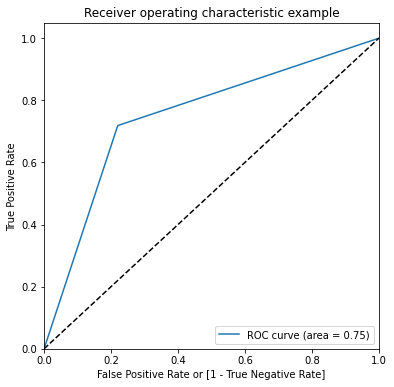

In [70]:
# Simple Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             max_depth=6,
                             min_samples_split=100,
                             min_samples_leaf=100)
dt.fit(X_train_pca, y_train)
get_model_metrics_using_predict("Decision Tree", dt, X_train_pca, X_test_pca, y_train, y_test)

In [71]:
# Compute intensive

# Decision Tree with Hyper Parameters

# parameters to build the model on
params = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(25, 175, 25),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini", "entropy"]
}

# instantiate the model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
grid_search_dt = GridSearchCV(dt, params, cv=3, n_jobs=-1, scoring="recall", return_train_score=True,verbose=1)
grid_search_dt.fit(X_train_pca, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.3min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 3),
                         'min_samples_leaf': range(25, 175, 25),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [72]:
# grid search results
score = grid_search_dt.cv_results_
pd.DataFrame(score).nlargest(5,"mean_test_score")
print(grid_search_dt.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=25, min_samples_split=50,
                       random_state=10)


In [73]:
# using the best fit parameters
dt_best = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                max_depth=14, min_samples_leaf=25,
                                min_samples_split=50,random_state=10)
dt_best.fit(X_train_pca, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=25, min_samples_split=50,
                       random_state=10)

--------------------------------------------------
Train Accuracy : 0.91
Train Confusion Matrix: [[15209  1721]
 [ 1360 15570]]
[[15209  1721]
 [ 1360 15570]]
--------------------------------------------------
Test Accuracy : 0.84
Test Confusion Matrix:
[[6199 1062]
 [ 207  415]]
--------------------------------------------------
AUC Score:
0.76
--------------------------------------------------
Precision Score:
0.28
--------------------------------------------------
Recall/Sensitivity Score:
0.67
--------------------------------------------------
F1 Score:
0.4
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7261
           1       0.28      0.67      0.40       622

    accuracy                           0.84      7883
   macro avg       0.62      0.76      0.65      7883
weighted avg       0.91      0.84      0.87      7883



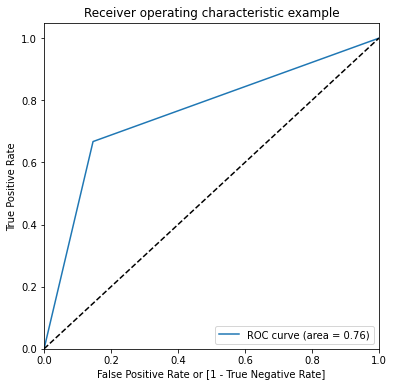

Roc_auc_score : 0.9090076786769049
Sensitivity/Recall : 0.919669226225635
Specificity: 0.8983461311281749
False Positive Rate: 0.10165386887182516
Positive predictive value: 0.9004684517957319
Negative Predictive value: 0.9179190053714769
sklearn precision score value: 0.9004684517957319
      prob  accuracy  sensi  speci
0.00  0.00      0.82   1.00   0.63
0.10  0.10      0.86   1.00   0.72
0.20  0.20      0.88   0.98   0.78
0.30  0.30      0.90   0.97   0.82
0.40  0.40      0.91   0.94   0.87
0.50  0.50      0.91   0.92   0.90
0.60  0.60      0.91   0.89   0.92
0.70  0.70      0.89   0.84   0.95
0.80  0.80      0.86   0.75   0.98
0.90  0.90      0.82   0.65   0.99


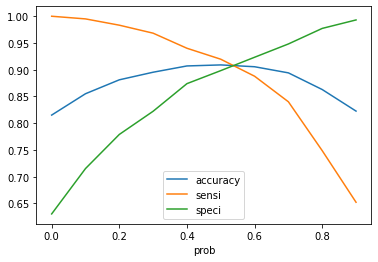

Train Metrics with probability: 0.5
Roc_auc_score : 0.9090076786769049
Sensitivity/Recall : 0.919669226225635
Specificity: 0.8983461311281749
False Positive Rate: 0.10165386887182516
Positive predictive value: 0.9004684517957319
Negative Predictive value: 0.9179190053714769
sklearn precision score value: 0.9004684517957319
--------------------------------------------------
Test Metrics with probability: 0.45
Roc_auc_score : 0.7609108211911321
Sensitivity/Recall : 0.680064308681672
Specificity: 0.8417573337005922
False Positive Rate: 0.1582426662994078
Positive predictive value: 0.26908396946564883
Negative Predictive value: 0.9684677547139915
sklearn precision score value: 0.26908396946564883


In [74]:
get_model_metrics_using_predict("Decision Tree - HyperParameters", dt_best, X_train_pca, X_test_pca, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_best,X_train_pca,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(dt_best,X_train_pca,y_train,cut_off_prob)
print("-"*50)
cut_off_prob=0.45
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(dt_best,X_test_pca,y_test,cut_off_prob)

#### Summary for Decision Tree
Accuracy : The model shows a train accuracy 91% and test accuracy of 84%, which shows the model is good and shows no overfiting.
AUC : The AUC score is 76% which is lesser than Logistic Regression
Recall : The recall is 67% with default predictions, it stays at 68 with reduced threshold.
Decision tree seems performing better than logistic regression in terms of test accuracy only but since recall is critical metric for this problem and there is a drop this model cannot be considered compared to logistic regression.

#### Random Forest

--------------------------------------------------
Train Accuracy : 1.0
Train Confusion Matrix: [[16930     0]
 [    0 16930]]
[[16930     0]
 [    0 16930]]
--------------------------------------------------
Test Accuracy : 0.92
Test Confusion Matrix:
[[6870  391]
 [ 263  359]]
--------------------------------------------------
AUC Score:
0.76
--------------------------------------------------
Precision Score:
0.48
--------------------------------------------------
Recall/Sensitivity Score:
0.58
--------------------------------------------------
F1 Score:
0.52
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7261
           1       0.48      0.58      0.52       622

    accuracy                           0.92      7883
   macro avg       0.72      0.76      0.74      7883
weighted avg       0.92      0.92      0.92      7883



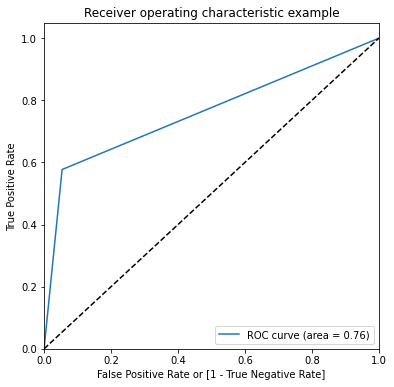

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0
      prob  accuracy  sensi  speci
0.00  0.00      0.55   1.00   0.09
0.10  0.10      0.92   1.00   0.84
0.20  0.20      0.98   1.00   0.95
0.30  0.30      0.99   1.00   0.99
0.40  0.40      1.00   1.00   1.00
0.50  0.50      1.00   1.00   1.00
0.60  0.60      1.00   1.00   1.00
0.70  0.70      1.00   1.00   1.00
0.80  0.80      0.99   0.97   1.00
0.90  0.90      0.93   0.85   1.00


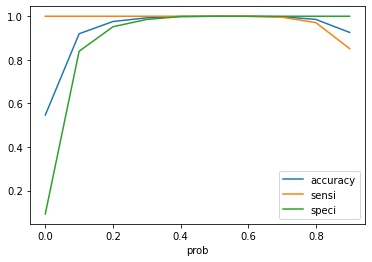

Train Metrics with probability: 0.5
Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0
--------------------------------------------------
Test Metrics with probability: 0.58
Roc_auc_score : 0.7400897673382574
Sensitivity/Recall : 0.5192926045016077
Specificity: 0.960886930174907
False Positive Rate: 0.03911306982509296
Positive predictive value: 0.5321252059308073
Negative Predictive value: 0.9589059923034634
sklearn precision score value: 0.5321252059308073


In [75]:
rf = RandomForestClassifier(random_state=42, max_depth=40, bootstrap=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
get_model_metrics_using_predict("Random Forest", rf, X_train_pca, X_test_pca, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(rf,X_train_pca,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(rf,X_train_pca,y_train,cut_off_prob)
cut_off_prob=0.58
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(rf,X_test_pca,y_test,cut_off_prob)

--------------------------------------------------
Train Accuracy : 0.88
Train Confusion Matrix: [[15129  1801]
 [ 2306 14624]]
[[15129  1801]
 [ 2306 14624]]
--------------------------------------------------
Test Accuracy : 0.87
Test Confusion Matrix:
[[6422  839]
 [ 157  465]]
--------------------------------------------------
AUC Score:
0.82
--------------------------------------------------
Precision Score:
0.36
--------------------------------------------------
Recall/Sensitivity Score:
0.75
--------------------------------------------------
F1 Score:
0.48
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7261
           1       0.36      0.75      0.48       622

    accuracy                           0.87      7883
   macro avg       0.67      0.82      0.71      7883
weighted avg       0.93      0.87      0.89      7883



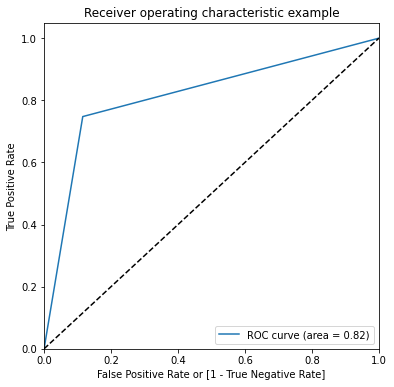

Roc_auc_score : 0.878706438275251
Sensitivity/Recall : 0.8637920850561134
Specificity: 0.8936207914943887
False Positive Rate: 0.10637920850561135
Positive predictive value: 0.8903500761035008
Negative Predictive value: 0.8677373100086034
sklearn precision score value: 0.8903500761035008
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.66   1.00   0.32
0.20  0.20      0.79   0.99   0.59
0.30  0.30      0.85   0.96   0.74
0.40  0.40      0.88   0.92   0.83
0.50  0.50      0.88   0.86   0.89
0.60  0.60      0.86   0.78   0.93
0.70  0.70      0.82   0.69   0.96
0.80  0.80      0.78   0.58   0.98
0.90  0.90      0.70   0.41   0.99


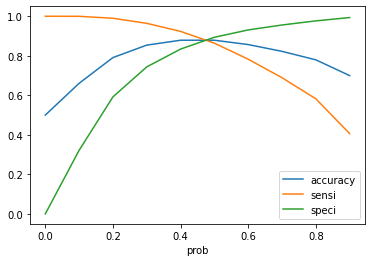

Train Metrics with probability: 0.5
Roc_auc_score : 0.878706438275251
Sensitivity/Recall : 0.8637920850561134
Specificity: 0.8936207914943887
False Positive Rate: 0.10637920850561135
Positive predictive value: 0.8903500761035008
Negative Predictive value: 0.8677373100086034
sklearn precision score value: 0.8903500761035008
--------------------------------------------------
Test Metrics with probability: 0.45
Roc_auc_score : 0.8209893094898482
Sensitivity/Recall : 0.7861736334405145
Specificity: 0.8558049855391819
False Positive Rate: 0.14419501446081806
Positive predictive value: 0.318359375
Negative Predictive value: 0.9790452182133291
sklearn precision score value: 0.318359375


In [76]:
# using the best fit parameters
rfc_best = RandomForestClassifier(random_state=42, max_depth=40, bootstrap=True, min_samples_leaf=100, 
                                  min_samples_split=200,
                                  max_features=20,
                                  n_estimators=100,
                                  oob_score = True, n_jobs = -1)
rfc_best.fit(X_train_pca, y_train)
get_model_metrics_using_predict("Random Forest - HyperParameter", rfc_best, X_train_pca, X_test_pca, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(rfc_best,X_train_pca,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(rfc_best,X_train_pca,y_train,cut_off_prob)
cut_off_prob=0.45
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(rfc_best,X_test_pca,y_test,cut_off_prob)

Summary for Random Forest
- Accuracy : The model shows a train accuracy 88% and test accuracy of 87%, which shows the model is better in terms of accuracy compared to logistic regression.
- AUC : The AUC score is 82% which is better than Logistic Regression
- Recall : The recall is 75% which is lesser than logistic regression, with 0.45 as the cut off threshold the recall can be increased to 78%.
Overall Random Forest does not provide impressive results than Logistic Regression with RFE

### XGboost

--------------------------------------------------
Train Accuracy : 0.86
Train Confusion Matrix: [[14737  2193]
 [ 2579 14351]]
[[14737  2193]
 [ 2579 14351]]
--------------------------------------------------
Test Accuracy : 0.86
Test Confusion Matrix:
[[6281  980]
 [ 152  470]]
--------------------------------------------------
AUC Score:
0.81
--------------------------------------------------
Precision Score:
0.32
--------------------------------------------------
Recall/Sensitivity Score:
0.76
--------------------------------------------------
F1 Score:
0.45
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7261
           1       0.32      0.76      0.45       622

    accuracy                           0.86      7883
   macro avg       0.65      0.81      0.69      7883
weighted avg       0.92      0.86      0.88      7883



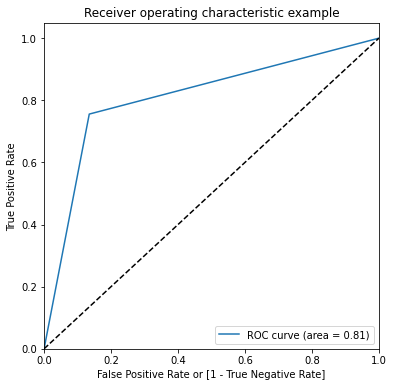

Roc_auc_score : 0.8590667454223273
Sensitivity/Recall : 0.8476668635558181
Specificity: 0.8704666272888364
False Positive Rate: 0.1295333727111636
Positive predictive value: 0.8674443907156673
Negative Predictive value: 0.851062601062601
sklearn precision score value: 0.8674443907156673
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.68   0.99   0.36
0.20  0.20      0.79   0.97   0.60
0.30  0.30      0.83   0.94   0.73
0.40  0.40      0.86   0.91   0.81
0.50  0.50      0.86   0.85   0.87
0.60  0.60      0.85   0.78   0.91
0.70  0.70      0.82   0.70   0.94
0.80  0.80      0.79   0.62   0.96
0.90  0.90      0.71   0.44   0.98


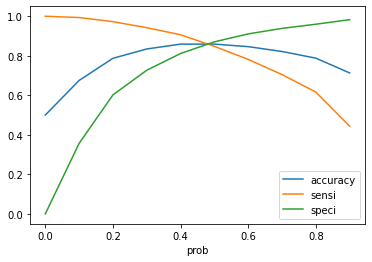

Train Metrics with probability: 0.5
Roc_auc_score : 0.8590667454223273
Sensitivity/Recall : 0.8476668635558181
Specificity: 0.8704666272888364
False Positive Rate: 0.1295333727111636
Positive predictive value: 0.8674443907156673
Negative Predictive value: 0.851062601062601
sklearn precision score value: 0.8674443907156673
--------------------------------------------------
Test Metrics with probability: 0.45
Roc_auc_score : 0.8161943891760189
Sensitivity/Recall : 0.7942122186495176
Specificity: 0.8381765597025204
False Positive Rate: 0.1618234402974797
Positive predictive value: 0.29598562013181545
Negative Predictive value: 0.9794013517862891
sklearn precision score value: 0.29598562013181545


In [77]:
# using the best fit parameters
import xgboost as xgb
xgboost_best = xgb.XGBClassifier(learning_rate=0.2,
                                max_depth=3,
                                min_child_weight=10,
                                n_estimators=30)
xgboost_best.fit(X_train_pca, y_train)
get_model_metrics_using_predict("XGBoost Classifier - HyperParameter", xgboost_best, X_train_pca, X_test_pca, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(xgboost_best,X_train_pca,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(xgboost_best,X_train_pca,y_train,cut_off_prob)
cut_off_prob=0.45
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(xgboost_best,X_test_pca,y_test,cut_off_prob)

#### Summary of XG Boost With PCA
- Accuracy : The model shows a train accuracy 86% and test accuracy of 86%, which shows the model is good.
- AUC : The AUC score is 81% which is less than Logistic Regression
- Recall : The recall is 76% which is lesser than logistic regression
Overall XG Boost does not provide impressive results than Logistic Regression with RFE if AUC and Accuracy are compared and the recall is same.

--------------------------------------------------
Train Accuracy : 0.86
Train Confusion Matrix: [[14208  2722]
 [ 1965 14965]]
[[14208  2722]
 [ 1965 14965]]
--------------------------------------------------
Test Accuracy : 0.83
Test Confusion Matrix:
[[6087 1174]
 [ 133  489]]
--------------------------------------------------
AUC Score:
0.81
--------------------------------------------------
Precision Score:
0.29
--------------------------------------------------
Recall/Sensitivity Score:
0.79
--------------------------------------------------
F1 Score:
0.43
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7261
           1       0.29      0.79      0.43       622

    accuracy                           0.83      7883
   macro avg       0.64      0.81      0.67      7883
weighted avg       0.92      0.83      0.87      7883



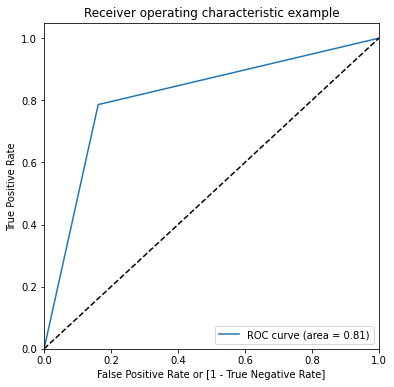

Roc_auc_score : 0.8615770821027762
Sensitivity/Recall : 0.883933845245127
Specificity: 0.8392203189604253
False Positive Rate: 0.1607796810395747
Positive predictive value: 0.8461016565839317
Negative Predictive value: 0.8785012057132258
sklearn precision score value: 0.8461016565839317
      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.50   1.00   0.00
0.20  0.20      0.50   1.00   0.00
0.30  0.30      0.50   1.00   0.00
0.40  0.40      0.50   1.00   0.00
0.50  0.50      0.86   0.88   0.84
0.60  0.60      0.50   0.00   1.00
0.70  0.70      0.50   0.00   1.00
0.80  0.80      0.50   0.00   1.00
0.90  0.90      0.50   0.00   1.00


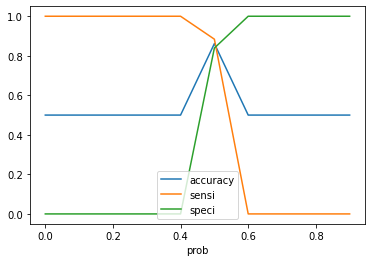

Train Metrics with probability: 0.5
Roc_auc_score : 0.8615770821027762
Sensitivity/Recall : 0.883933845245127
Specificity: 0.8392203189604253
False Positive Rate: 0.1607796810395747
Positive predictive value: 0.8461016565839317
Negative Predictive value: 0.8785012057132258
sklearn precision score value: 0.8461016565839317
--------------------------------------------------
Test Metrics with probability: 0.5
Roc_auc_score : 0.8122439576099418
Sensitivity/Recall : 0.7861736334405145
Specificity: 0.8383142817793693
False Positive Rate: 0.16168571822063077
Positive predictive value: 0.29404690318701143
Negative Predictive value: 0.9786173633440515
sklearn precision score value: 0.29404690318701143


In [78]:
## XG Boost without PCA
xgboost_withoutpca = xgb.XGBClassifier(learning_rate=0.001,
                                max_depth=3,
                                min_child_weight=15,
                                n_estimators=20)
xgboost_withoutpca.fit(X_train_ns, y_train)
get_model_metrics_using_predict("XGBoost Classifier - HyperParameter - Without PCA", xgboost_withoutpca, X_train_ns, X_test_ns,
                                y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(xgboost_withoutpca,X_train_ns,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(xgboost_withoutpca,X_train_ns,y_train,cut_off_prob)
cut_off_prob=0.5
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(xgboost_withoutpca,X_test_ns,y_test,cut_off_prob)

Summary of XG Boost Without PCA & Scaling, because XGBoost does not need scaling
- Accuracy : The model shows a train accuracy 86% and test accuracy of 83%, which shows the model is better without PCA
- AUC : The AUC score is 81% which is almost same as Logistic Regression and better than XGBoost with PCA
- Recall : The recall is 79% which is same as of logistic regression
Overall XG Boost without PCA provide impressive results than with PCA

### SVM

In [79]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [80]:
svm0.fit(X_train_pca, y_train)

# predict on train
y_pred = svm0.predict(X_train_pca)
getModelMetrics(y_train,y_pred)

Roc_auc_score : 0.9240696987595983
Sensitivity/Recall : 0.9459539279385706
Specificity: 0.9021854695806261
False Positive Rate: 0.0978145304193739
Positive predictive value: 0.9062871371173109
Negative Predictive value: 0.9434801408363703
sklearn precision score value: 0.9062871371173109


In [81]:
# Predict on test
y_pred = svm0.predict(X_test_pca)
getModelMetrics(y_test,y_pred)

Roc_auc_score : 0.8167519200273142
Sensitivity/Recall : 0.7395498392282959
Specificity: 0.8939540008263325
False Positive Rate: 0.10604599917366754
Positive predictive value: 0.37398373983739835
Negative Predictive value: 0.9756500826694724
sklearn precision score value: 0.37398373983739835


In [82]:
# Compute intensive - 100 seconds on 32 core machine. 

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 11.3min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=1)

--------------------------------------------------
Train Accuracy : 0.99
Train Confusion Matrix: [[16634   296]
 [    8 16922]]
[[16634   296]
 [    8 16922]]
--------------------------------------------------
Test Accuracy : 0.9
Test Confusion Matrix:
[[6747  514]
 [ 281  341]]
--------------------------------------------------
AUC Score:
0.74
--------------------------------------------------
Precision Score:
0.4
--------------------------------------------------
Recall/Sensitivity Score:
0.55
--------------------------------------------------
F1 Score:
0.46
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7261
           1       0.40      0.55      0.46       622

    accuracy                           0.90      7883
   macro avg       0.68      0.74      0.70      7883
weighted avg       0.92      0.90      0.91      7883



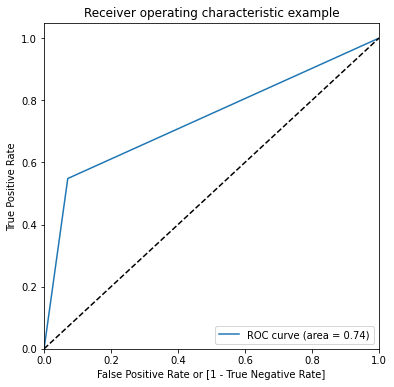

Roc_auc_score : 0.7387211818768374
Sensitivity/Recall : 0.5482315112540193
Specificity: 0.9292108524996557
False Positive Rate: 0.0707891475003443
Positive predictive value: 0.39883040935672515
Negative Predictive value: 0.9600170745589073
sklearn precision score value: 0.39883040935672515


In [83]:
svm_final = SVC(C = 1000)
# fit
svm_final.fit(X_train_pca, y_train)
# predict
y_pred = svm_final.predict(X_test_pca)
get_model_metrics_using_predict("SVM Linear", svm_final, X_train_pca, X_test_pca, y_train, y_test)
getModelMetrics(y_test,y_pred)

--------------------------------------------------
Train Accuracy : 0.99
Train Confusion Matrix: [[16634   296]
 [    8 16922]]
[[16634   296]
 [    8 16922]]
--------------------------------------------------
Test Accuracy : 0.9
Test Confusion Matrix:
[[6747  514]
 [ 281  341]]
--------------------------------------------------
AUC Score:
0.74
--------------------------------------------------
Precision Score:
0.4
--------------------------------------------------
Recall/Sensitivity Score:
0.55
--------------------------------------------------
F1 Score:
0.46
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7261
           1       0.40      0.55      0.46       622

    accuracy                           0.90      7883
   macro avg       0.68      0.74      0.70      7883
weighted avg       0.92      0.90      0.91      7883



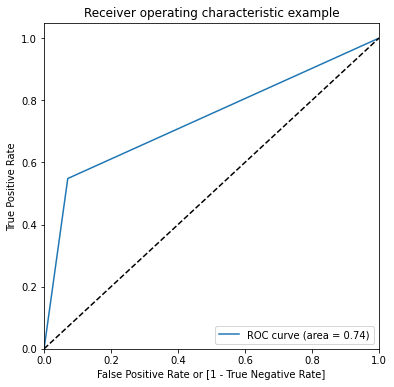

Roc_auc_score : 0.7387211818768374
Sensitivity/Recall : 0.5482315112540193
Specificity: 0.9292108524996557
False Positive Rate: 0.0707891475003443
Positive predictive value: 0.39883040935672515
Negative Predictive value: 0.9600170745589073
sklearn precision score value: 0.39883040935672515


In [84]:
svm_k = SVC(C = 1000, kernel='rbf')
svm_k.fit(X_train_pca, y_train)
y_pred = svm_k.predict(X_test_pca)
get_model_metrics_using_predict("SVM Non Linear", svm_k, X_train_pca, X_test_pca, y_train, y_test)
getModelMetrics(y_test,y_pred)

In [85]:
models = pd.DataFrame(model_metrics)
models

,model_name,train_accuracy,test_accuracy,auc,precision,recall,f1,model
0,Logistic Regression,0.84,0.82,0.82,0.29,0.82,0.43,LogisticRegression()
1,Logistic Regression - HyperParameters,0.84,0.83,0.83,0.29,0.83,0.43,LogisticRegression(C=0.01)
2,Logistic Regression - RFE,0.84,0.81,0.82,0.27,0.82,0.41,"LogisticRegression(C=0.1, random_state=100)"
3,Decision Tree,0.79,0.78,0.75,0.22,0.72,0.34,DecisionTreeClassifier(class_weight='balanced'...
4,Decision Tree - HyperParameters,0.91,0.84,0.76,0.28,0.67,0.40,DecisionTreeClassifier(class_weight='balanced'...
5,Random Forest,1.00,0.92,0.76,0.48,0.58,0.52,"(DecisionTreeClassifier(max_depth=40, max_feat..."
6,Random Forest - HyperParameter,0.88,0.87,0.82,0.36,0.75,0.48,"(DecisionTreeClassifier(max_depth=40, max_feat..."
7,XGBoost Classifier - HyperParameter,0.86,0.86,0.81,0.32,0.76,0.45,"XGBClassifier(base_score=0.5, booster='gbtree'..."
8,XGBoost Classifier - HyperParameter - Without PCA,0.86,0.83,0.81,0.29,0.79,0.43,"XGBClassifier(base_score=0.5, booster='gbtree'..."
9,SVM Linear,0.99,0.90,0.74,0.40,0.55,0.46,SVC(C=1000)


Accordingly

1st Best Model name - Logistic Regression - HyperParameters because the high Interpretibility, Linearity, F1 score, recall and test accuracy.
2nd Best Model - Logistic Regression - RFE due to interpretibility, simplicity and comparitively good recall.
3rd Best Model - XGBoost Classifier - HyperParameter - Without PCA

In [ ]:
final_model_metrics = models.iloc[1,:]
final_model_metrics
final_model.coef_

In [ ]:
# list of important features by variance in relation to the target variable.
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC-1':pca_final.components_[0],'PC-2':pca_final.components_[1], 'PC-3':pca_final.components_[2],'Feature':col})
df_pca.head(15)


In [ ]:
# Columns identified by Logistic Regression with RFE the second best model
rfe_cols

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(model_rfe.coef_))], axis = 1)
coefficients.columns = ['Features', 'Coefficients']
coefficients.head(len(rfe_cols)).sort_values(by="Coefficients", ascending=False)

#### Churn Indicators
Let us use Logistic Regression with RFE to identify some key indicators for churn, since it is our second best model. We may not get the highest recall rate as Logistic Regression with PCA, anything near should give us an understanding of the best features.

In [ ]:
# Re-running the model once again 

from sklearn.feature_selection import RFE
logit_rfe = LogisticRegression(random_state=100, C=0.001)
rfe = RFE(logit_rfe, 20)
rfe = rfe.fit(X_train, y_train)
rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
model_rfe = logit_rfe.fit(X_train_rfe, y_train)
get_model_metrics_using_predict("Logistic Regression - RFE", model_rfe, X_train_rfe, X_test_rfe, y_train, y_test)
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(model_rfe,X_train_rfe,y_train,cut_off_prob)
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)
# predicting churn with cut-off 0.5
cut_off_prob=0.5
print("Train Metrics with probability: {0}".format(cut_off_prob))
y_train_df = predictChurnWithProb(model_rfe,X_train_rfe,y_train,cut_off_prob)
cut_off_prob=0.45
print("-"*50)
print("Test Metrics with probability: {0}".format(cut_off_prob))
y_test_df= predictChurnWithProb(model_rfe,X_test_rfe,y_test,cut_off_prob)
model_rfe

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Anything greater than 5 is considered high VIF, no columns below 5 so we are good.
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(model_rfe.coef_))], axis = 1)
coefficients.columns = ['Features', 'Coefficients']
coefficients.head(len(rfe_cols)).sort_values(by="Coefficients", ascending=False)


In [ ]:
an observation 
# is in the target class (“1”) given the values of its X variables. 
# Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them.

odds = np.exp(model_rfe.coef_[0])
df_coef = pd.DataFrame(odds, X_train_rfe.columns, columns=['coef']).sort_values(by='coef', ascending=False)
df_coef

In [ ]:
df_coef.plot.bar()

The graph above suggest that the top 20 features ranked in order of importance as produced by our model choosen for analysis. The features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers.



### recommendations to avoid churn
- The Business should watch outgoing roaming calls in the action month, it could be that the customer is planning to be roaming for some more time and may find it helpful if attractive roaming plans are provided.
- Monthly recharges fell drastically, so the telecom company should start looking for monthly recharge drops from the beginnning and also in the action month.
- The roaming usage of churners is way higher than those of non-churners across all months, People who are making/reciving more roaming calls during their tenure are more likely to churn. This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.
- The avg. last recharge amount for churners is less than half the amount of that of the non-churners. Suggesting, as the recharge amount reduces for a customer its chances to churn increases.
- Monthly recharges fell from 727 to 582 which is 19% and then drastically to 168 which is 70% drop, so the telecom company should start looking for monthly recharge drops from the beginnning and also in the action month.
- Sudden drop in incoming STD (same network) noticed for churned customers while it is consistent for non-churned customers.
- Age on network - 77% of the users who churned are within 3 years, which means the customers who are loyal i.e > 3 years are less likely to churn.The telecom company should look for options to increase the loyality factor for high value customers, who are with the network for 3 years or less. It can also look for 2 years or less if budget is a factor for providing any perks.